In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sacc

In [7]:
truez_shear = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full-10mpc-2026/cluster_shear_catalogs.hdf5'



### CLCosmoSim Data

<Figure size 700x400 with 0 Axes>

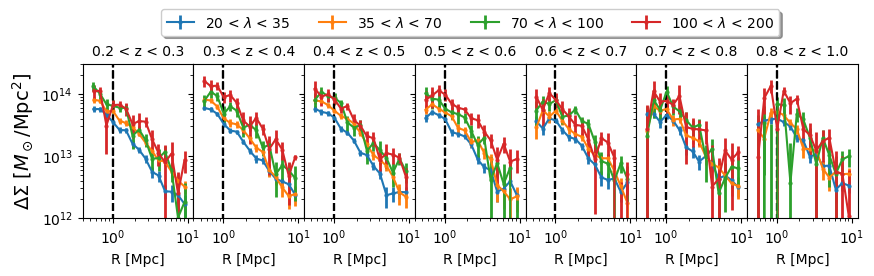

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
sys.path.append('/sps/lsst/users/ebarroso/CLCosmo_Sim')
import _redshift_richness_bins as analysis

plt.figure(figsize=(7,4))
index = 12
fmt = ['-', '--', '.']
suff = '_full_coverage'
path_to_data = '/sps/lsst/users/ebarroso/CLCosmo_Sim_database/data/'
data = np.load(path_to_data + f'stacked_esd_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles = data['stacked profile']
covariances = data['stacked covariance']
Z_bin = analysis.Z_bin
Obs_bin = analysis.Obs_bin
n_z_bin = len(Z_bin) 
n_m_bin = len(Obs_bin) 
fig, axs = plt.subplots(1,len(Z_bin), figsize = (10,2))
fig.subplots_adjust(wspace=0, hspace=0)
for i, z_bin in enumerate(Z_bin):
    for j, m_bin in enumerate(Obs_bin):

            label_z =   f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}'
            label_M = f'{m_bin[0]:.0f} < ' + r'$\lambda$' +f' < {m_bin[1]:.0f}'
            mask_z = (profiles['z_mean'] > z_bin[0])*(profiles['z_mean'] < z_bin[1])
            mask_m = (profiles['obs_mean'] > m_bin[0])*(profiles['obs_mean'] < m_bin[1])
            index = np.arange(len(profiles))
            index_cut = index[mask_m * mask_z]
            f_cut = profiles[index_cut]
            cov = np.array(covariances['cov_t'][index_cut])
            err = cov.T.diagonal()**.5
            axs[i].errorbar(f_cut['radius'][0], f_cut['gt'][0] , err[0],
                            marker = 'o',fmt = '-', elinewidth = 2,  markersize = 2, markerfacecolor = None, label = label_M)
            axs[i].set_ylim(1e12, 3e14)
            axs[i].set_xlim(0.4, 12)
            axs[i].set_xscale('log')
            axs[i].set_yscale('log')
            axs[i].vlines(1, 0, 1e19, ls='--', color='k')
            axs[i].tick_params(axis='both', which = 'major', labelsize= 10)
            #axs[0].legend(frameon = False, loc = 'upper right', fontsize = 10)
            axs[i].set_xlabel('R [Mpc]', fontsize = 10)
            axs[i].set_title(label_z, fontsize = 10)
            axs[0].set_ylabel(r'$\Delta\Sigma\ [M_\odot/$Mpc$^2]$', fontsize=14)
        #except: a=1
        
plt.legend(loc='upper center', bbox_to_anchor=(-2.5, 1.4),
          ncol=4, fancybox=True, shadow=True)

for ax in fig.get_axes():
    ax.label_outer()
#plt.savefig('../fig/stacked_redmapper_profiles.png', bbox_inches='tight', dpi=100)

## Comparison to CLCosmoSim data
First for 10mpc to see the whole vector and then for the interval we use for cosmology, R = [1.1, 3.7] MPC

('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_0')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_1')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_2')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_3')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_4')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_5')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_6')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_7')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_8')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_9')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_10')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_11')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_12')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_13')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_14')
('cosmodc2_redmapper', 'bin_rich_1', 'bin_z_2', 'radius_0')
('cosmodc2_redmapper', 'bin_rich_1'

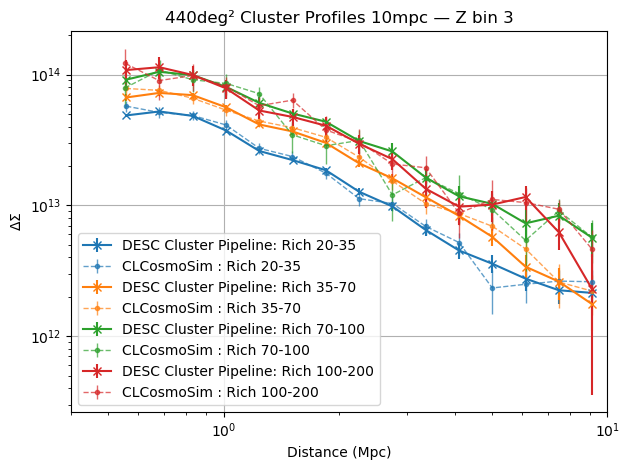

In [29]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
rich_bin_label = ["20-35","35-70", "70-100", "100-200"]

t1 = sacc.Sacc.load_fits("/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full-10mpc-2026/cluster_sacc_catalog.sacc")
# Color map to ensure consistent color across both plots
cmap = plt.get_cmap('tab10')  # Or use the same cmap as your SACC plots
z_bin_index = 2  # Third z-bin
z_bin = Z_bin[z_bin_index]
zbin = 'bin_z_2'
# Begin loop over richness bins
for rich_bin_index in range(4):
    rich_bin = f'bin_rich_{rich_bin_index}'
    color = cmap(rich_bin_index)  # Get consistent color per bin

    data_true = []
    data_true_error = []

    radius_vals = []

    for i in range(15):
        radius_key = f'radius_{i}'
        trac = ('cosmodc2_redmapper', rich_bin, zbin, radius_key)
        print(trac)
        radius = t1.tracers[radius_key].center
        radius_vals.append(radius)
        data_true.append(t1.get_data_points(sacc.data_types.standard_types.cluster_delta_sigma, trac)[0].value)
        index = t1.indices(sacc.data_types.standard_types.cluster_delta_sigma, trac)
        data_true_error.append(np.sqrt(t1.covariance.covmat[index][:, index][0, 0]))

    # Plot SACC profile
    plt.errorbar(
        radius_vals, data_true, yerr=data_true_error,
        label=f'DESC Cluster Pipeline: Rich {rich_bin_label[rich_bin_index]}', marker='x', color=color, linestyle='-'
    )

    # --- Overlay original profile (dashed line) from Z_bin[2] ---
    m_bin = Obs_bin[rich_bin_index]
    mask_z = (profiles['z_mean'] > z_bin[0]) & (profiles['z_mean'] < z_bin[1])
    mask_m = (profiles['obs_mean'] > m_bin[0]) & (profiles['obs_mean'] < m_bin[1])
    index_cut = np.where(mask_z & mask_m)[0]

    if len(index_cut) > 0:
        f_cut = profiles[index_cut]
        cov = np.array(covariances['cov_t'][index_cut])
        err = cov.T.diagonal()**0.5
        plt.errorbar(
            f_cut['radius'][0], f_cut['gt'][0], err[0],
            label=f'CLCosmoSim : Rich {rich_bin_label[rich_bin_index]}', fmt='--', color=color,
            elinewidth=1, linewidth=1, markersize=3, marker='o', alpha=0.7
        )
plt.xlabel('Distance (Mpc)')
plt.ylabel(r'$\Delta \Sigma$')
plt.title(f'440deg² Cluster Profiles 10mpc — Z bin {z_bin_index + 1}')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.4, 10)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



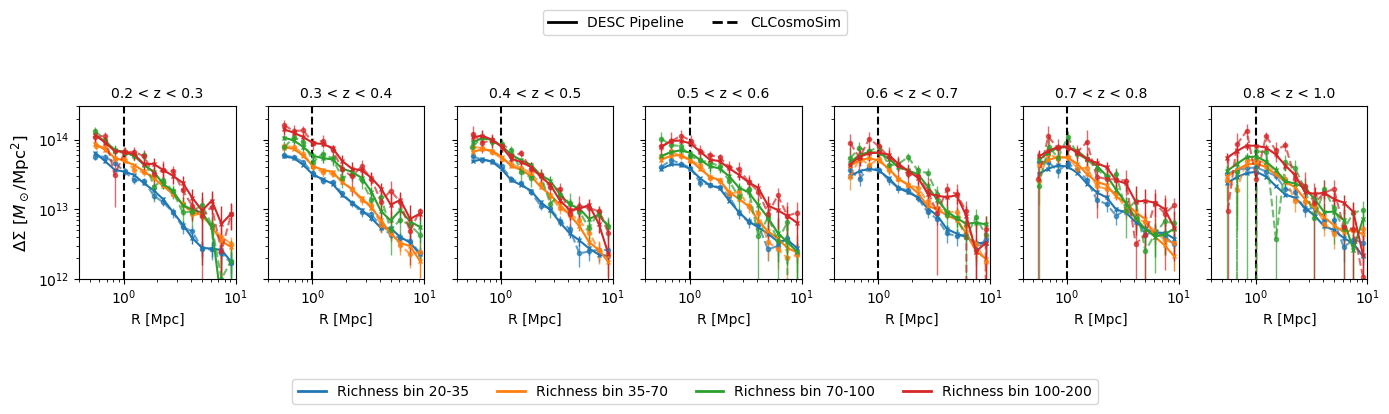

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
# Load SACC catalog
t1 = sacc.Sacc.load_fits(
    "/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/"
    "cosmodc2/outputs-full-10mpc-2026/cluster_sacc_catalog.sacc"
)

cmap = plt.get_cmap('tab10')  # consistent colors for richness bins
n_z_bin = len(Z_bin)
n_r_bin = len(Obs_bin)
n_radius = 15

fig, axs = plt.subplots(1, n_z_bin, figsize=(14, 3), sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)

# Keep track of legend handles
handles = []

for i, z_bin in enumerate(Z_bin):
    ax = axs[i]

    for j, m_bin in enumerate(Obs_bin):
        rich_bin = f'bin_rich_{j}'
        zbin = f'bin_z_{i}'
        color = cmap(j)

        radius_vals = []
        data_true = []
        data_true_error = []

        for k in range(n_radius):
            radius_key = f'radius_{k}'
            trac = ('cosmodc2_redmapper', rich_bin, zbin, radius_key)

            radius = t1.tracers[radius_key].center
            radius_vals.append(radius)

            data = t1.get_data_points(
                sacc.data_types.standard_types.cluster_delta_sigma, trac
            )[0].value
            idx = t1.indices(sacc.data_types.standard_types.cluster_delta_sigma, trac)
            error = np.sqrt(t1.covariance.covmat[idx][:, idx][0, 0])

            data_true.append(data)
            data_true_error.append(error)

        # Plot DESC pipeline
        desc_line = ax.errorbar(
            radius_vals, data_true, yerr=data_true_error,
            color=color, linestyle='-', marker='x', markersize=3, elinewidth=1
        )

        # Overlay Constantin
        mask_z = (profiles['z_mean'] > z_bin[0]) & (profiles['z_mean'] < z_bin[1])
        mask_m = (profiles['obs_mean'] > m_bin[0]) & (profiles['obs_mean'] < m_bin[1])
        index_cut = np.where(mask_z & mask_m)[0]

        if len(index_cut) > 0:
            f_cut = profiles[index_cut]
            cov = np.array(covariances['cov_t'][index_cut])
            err = cov.T.diagonal() ** 0.5

            const_line = ax.errorbar(
                f_cut['radius'][0], f_cut['gt'][0], yerr=err[0],
                color=color, linestyle='--', marker='o', markersize=3, alpha=0.7, elinewidth=1
            )

        # Only add one handle per color to legend
        if i == 0:  # only do for first panel
            handles.append((desc_line, const_line))

    # Axes formatting
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(0.4, 10)
    ax.set_ylim(1e12, 3e14)
    ax.vlines(1, 1e12, 3e14, ls='--', color='k')
    ax.set_title(f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}', fontsize=10)
    ax.set_xlabel('R [Mpc]', fontsize=10)
    if i == 0:
        ax.set_ylabel(r'$\Delta\Sigma\ [M_\odot/$Mpc$^2]$', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

from matplotlib.lines import Line2D

# --- Legend handles for line style ---
style_handles = [
    Line2D([0], [0], color='k', lw=2, linestyle='-', label='DESC Pipeline'),
    Line2D([0], [0], color='k', lw=2, linestyle='--', label='CLCosmoSim')
]

# --- Legend handles for richness colors ---
cmap = plt.get_cmap('tab10')
color_handles = [    Line2D([0], [0], color=cmap(j), lw=2, linestyle='-', label=f'Richness bin {binj}') for j,binj in enumerate(rich_bin_label)]

# --- Add legends separately ---
# Line style legend above figure
fig.legend(
    handles=style_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    frameon=True
)

# Richness color legend below figure
fig.legend(
    handles=color_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=len(Obs_bin),
    frameon=True
)

plt.tight_layout(rect=[0,0.05,1,0.95])  # leave space for both legends
plt.show()



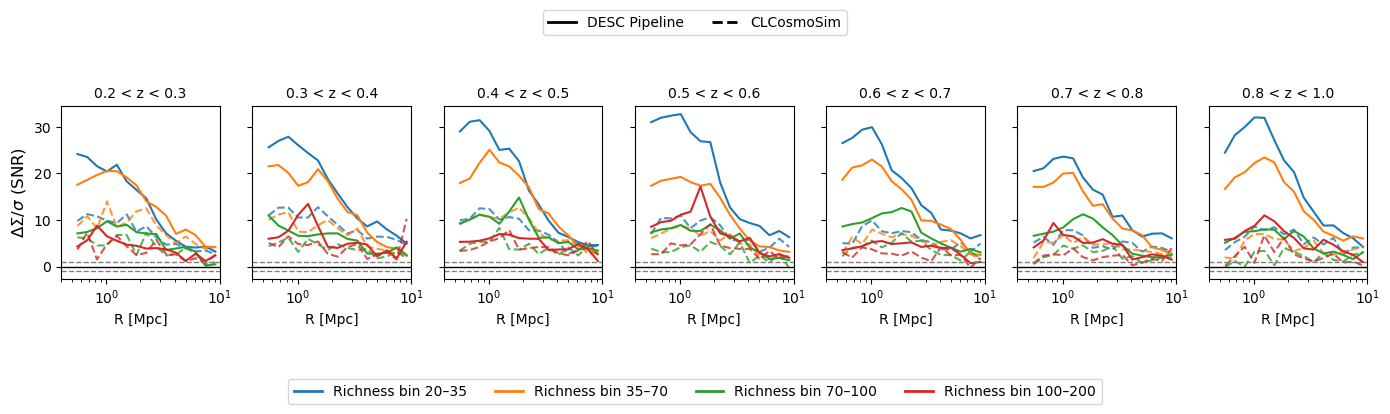

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import sacc

# -------------------------
# Load SACC catalog
# -------------------------

t1 = sacc.Sacc.load_fits(
    "/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/"
    "cosmodc2/outputs-full-10mpc-2026/cluster_sacc_catalog.sacc"
)

cmap = plt.get_cmap('tab10')

n_z_bin = len(Z_bin)
n_r_bin = len(Obs_bin)
n_radius = 15

fig, axs = plt.subplots(1, n_z_bin, figsize=(14, 3), sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)

# -------------------------
# Loop over redshift bins
# -------------------------

for i, z_bin in enumerate(Z_bin):

    ax = axs[i]

    for j, m_bin in enumerate(Obs_bin):

        rich_bin = f'bin_rich_{j}'
        zbin = f'bin_z_{i}'
        color = cmap(j)

        radius_vals = []
        sn_desc = []

        # -------------------------
        # DESC pipeline S/N
        # -------------------------

        for k in range(n_radius):

            radius_key = f'radius_{k}'
            trac = ('cosmodc2_redmapper', rich_bin, zbin, radius_key)

            radius = t1.tracers[radius_key].center
            radius_vals.append(radius)

            # Signal
            data = t1.get_data_points(
                sacc.data_types.standard_types.cluster_delta_sigma,
                trac
            )[0].value

            # Diagonal covariance error
            idx = t1.indices(
                sacc.data_types.standard_types.cluster_delta_sigma,
                trac
            )
            error = np.sqrt(t1.covariance.covmat[idx][:, idx][0, 0])

            sn_desc.append(data / error)

        sn_desc = np.array(sn_desc)

        # Plot DESC
        ax.plot(
            radius_vals,
            sn_desc,
            color=color,
            linestyle='-',
            markersize=4
        )

        # -------------------------
        # Constantin / CLCosmoSim S/N
        # -------------------------

        mask_z = (profiles['z_mean'] > z_bin[0]) & (profiles['z_mean'] < z_bin[1])
        mask_m = (profiles['obs_mean'] > m_bin[0]) & (profiles['obs_mean'] < m_bin[1])
        index_cut = np.where(mask_z & mask_m)[0]

        if len(index_cut) > 0:

            f_cut = profiles[index_cut]
            cov = np.array(covariances['cov_t'][index_cut])

            err = cov.T.diagonal() ** 0.5
            sn_const = f_cut['gt'][0] / err[0]

            ax.plot(
                f_cut['radius'][0],
                sn_const,
                color=color,
                linestyle='--',
                markersize=4,
                alpha=0.8
            )

    # -------------------------
    # Axis formatting
    # -------------------------

    ax.set_xscale('log')
    ax.set_xlim(0.4, 10)

    ax.axhline(0, color='k', linewidth=1)
    ax.axhline(1, color='gray', linestyle='--', linewidth=1)
    ax.axhline(-1, color='gray', linestyle='--', linewidth=1)

    ax.set_title(f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}', fontsize=10)
    ax.set_xlabel('R [Mpc]', fontsize=10)

    if i == 0:
        ax.set_ylabel(r'$\Delta\Sigma / \sigma$ (SNR)', fontsize=12)

    ax.tick_params(axis='both', which='major', labelsize=10)

# -------------------------
# Legends
# -------------------------

style_handles = [
    Line2D([0], [0], color='k', lw=2, linestyle='-', label='DESC Pipeline'),
    Line2D([0], [0], color='k', lw=2, linestyle='--', label='CLCosmoSim')
]

color_handles = [
    Line2D([0], [0], color=cmap(j), lw=2, linestyle='-',
           label=f'Richness bin {binj}')
    for j, binj in enumerate(rich_bin_label)
]

fig.legend(
    handles=style_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    frameon=True
)

fig.legend(
    handles=color_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=len(Obs_bin),
    frameon=True
)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

## Cosmological Data Vector

[[0.2 0.3]
 [0.3 0.4]
 [0.4 0.5]
 [0.5 0.6]
 [0.6 0.7]
 [0.7 0.8]
 [0.8 1. ]]
[[0.2, 0.3], [0.3, 0.4], [0.4, 0.5], [0.5, 0.6], [0.6, 0.7], [0.7, 0.8]]


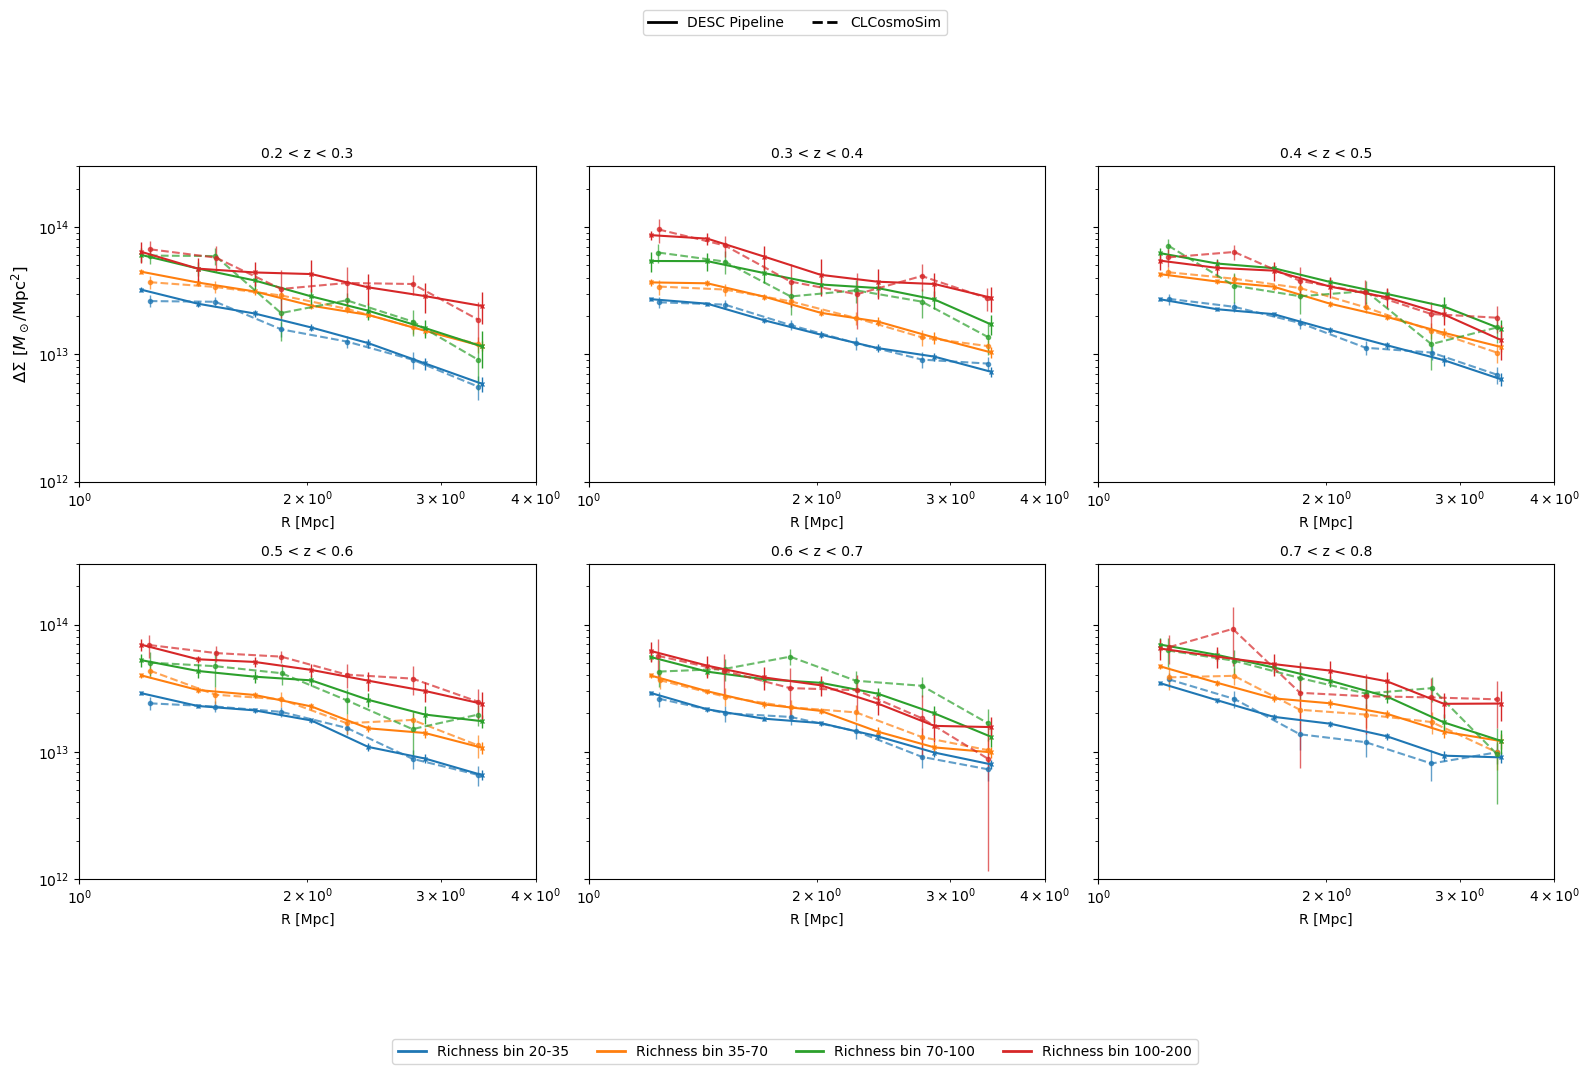

In [51]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.lines import Line2D

# Load SACC catalog
t1 = sacc.Sacc.load_fits(
    "/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/"
    "cosmodc2/outputs-full-2026/cluster_sacc_catalog.sacc"
)

cmap = plt.get_cmap('tab10')

n_z_bin = 6
n_r_bin = 4
print(Z_bin)
Z_bin_cosmo = [[0.2 ,0.3], [0.3 ,0.4], [0.4, 0.5], [0.5, 0.6], [0.6, 0.7], [0.7 ,0.8]]
print(Z_bin_cosmo)
fig, axs = plt.subplots(2, 3, figsize=(16, 9), sharey=True)
axs = axs.flatten()
fig.subplots_adjust(wspace=0, hspace=0)

for i, z_bin in enumerate(Z_bin_cosmo):

    ax = axs[i]

    for j, m_bin in enumerate(Obs_bin):

        rich_bin = f'bin_rich_{j}'
        zbin = f'bin_z_{i}'
        color = cmap(j)

        radius_vals = []
        data_true = []
        data_true_error = []

        # --------------------------
        # DESC pipeline (reference)
        # --------------------------
        for k in range(n_radius):

            radius_key = f'radius_{k}'
            trac = ('cosmodc2_redmapper', rich_bin, zbin, radius_key)

            radius = t1.tracers[radius_key].center
            radius_vals.append(radius)

            data = t1.get_data_points(
                sacc.data_types.standard_types.cluster_delta_sigma, trac
            )[0].value

            idx = t1.indices(
                sacc.data_types.standard_types.cluster_delta_sigma, trac
            )

            error = np.sqrt(t1.covariance.covmat[idx][:, idx][0, 0])

            data_true.append(data)
            data_true_error.append(error)

        desc_line = ax.errorbar(
            radius_vals,
            data_true,
            yerr=data_true_error,
            color=color,
            linestyle='-',
            marker='x',
            markersize=3,
            elinewidth=1
        )

        # ----------------------------------------
        # CLCosmoSim (filtered to matching support)
        # ----------------------------------------

        # Match redshift + richness bin
        mask_z = (profiles['z_mean'] > z_bin[0]) & (profiles['z_mean'] < z_bin[1])
        mask_m = (profiles['obs_mean'] > m_bin[0]) & (profiles['obs_mean'] < m_bin[1])
        index_cut = np.where(mask_z & mask_m)[0]

        if len(index_cut) > 0:

            f_cut = profiles[index_cut]

            r_cl = f_cut['radius'][0]
            gt_cl = f_cut['gt'][0]

            # --- FILTER RADII TO DESC RANGE ---
            r_desc_min = min(radius_vals)
            r_desc_max = max(radius_vals)

            mask_r = (r_cl >= r_desc_min) & (r_cl <= r_desc_max)

            if np.any(mask_r):

                cov = np.array(covariances['cov_t'][index_cut])[0]
                err = np.sqrt(np.diag(cov))

                const_line = ax.errorbar(
                    r_cl[mask_r],
                    gt_cl[mask_r],
                    yerr=err[mask_r],
                    color=color,
                    linestyle='--',
                    marker='o',
                    markersize=3,
                    alpha=0.7,
                    elinewidth=1
                )

    # --------------------------
    # Axis formatting
    # --------------------------
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1.0, 4.0)
    ax.set_ylim(1e12, 3e14)

    ax.set_title(f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}', fontsize=10)
    ax.set_xlabel('R [Mpc]', fontsize=10)

    if i == 0:
        ax.set_ylabel(r'$\Delta\Sigma\ [M_\odot/$Mpc$^2]$', fontsize=12)

    ax.tick_params(axis='both', which='major', labelsize=10)

# --------------------------
# Legends
# --------------------------

style_handles = [
    Line2D([0], [0], color='k', lw=2, linestyle='-', label='DESC Pipeline'),
    Line2D([0], [0], color='k', lw=2, linestyle='--', label='CLCosmoSim')
]

color_handles = [
    Line2D([0], [0], color=cmap(j), lw=2, linestyle='-',
           label=f'Richness bin {binj}')
    for j, binj in enumerate(rich_bin_label)
]

fig.legend(
    handles=style_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    frameon=True
)

fig.legend(
    handles=color_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=len(Obs_bin),
    frameon=True
)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

## Counts Data Vector DESC

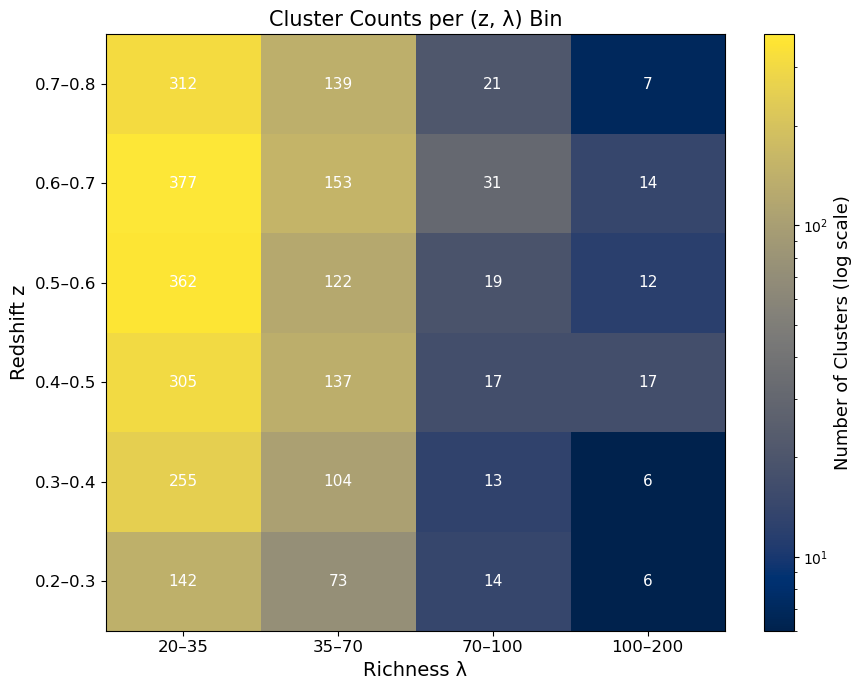

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sacc

# -------------------------
# Labels
# -------------------------

rich_bin_label = ["20–35", "35–70", "70–100", "100–200"]
z_bin_label = ["0.2–0.3", "0.3–0.4", "0.4–0.5",
               "0.5–0.6", "0.6–0.7", "0.7–0.8"]

# -------------------------
# Load catalog
# -------------------------

t1 = sacc.Sacc.load_fits(
    "/sps/lsst/groups/clusters/cl_pipeline_project/"
    "TXPipe_data/cosmodc2/outputs-full-2026/"
    "cluster_sacc_catalog.sacc"
)

n_z_bin = len(z_bin_label)
n_r_bin = len(rich_bin_label)

counts_matrix = np.zeros((n_z_bin, n_r_bin))

# -------------------------
# Extract counts
# -------------------------

for i in range(n_z_bin):
    for j in range(n_r_bin):

        rich_bin = f'bin_rich_{j}'
        zbin = f'bin_z_{i}'

        trac = ('cosmodc2_redmapper', rich_bin, zbin)

        data = t1.get_data_points(
            data_type=sacc.standard_types.cluster_counts,
            tracers=trac
        )

        counts_matrix[i, j] = data[0].value if len(data) > 0 else np.nan

# -------------------------
# Plot heatmap
# -------------------------

fig, ax = plt.subplots(figsize=(9, 7))

im = ax.imshow(
    counts_matrix,
    origin='lower',
    cmap='cividis',          # better perceptual map
    aspect='auto',
    norm=mcolors.LogNorm(vmin=np.nanmin(counts_matrix[counts_matrix>0]),
                         vmax=np.nanmax(counts_matrix))
)

# Axis ticks and labels
ax.set_xticks(np.arange(n_r_bin))
ax.set_yticks(np.arange(n_z_bin))

ax.set_xticklabels(rich_bin_label, fontsize=12)
ax.set_yticklabels(z_bin_label, fontsize=12)

ax.set_xlabel("Richness λ", fontsize=14)
ax.set_ylabel("Redshift z", fontsize=14)
ax.set_title("Cluster Counts per (z, λ) Bin", fontsize=15)

# Add values inside cells
for i in range(n_z_bin):
    for j in range(n_r_bin):
        val = counts_matrix[i, j]
        if not np.isnan(val):
            ax.text(
                j, i,
                f"{int(val)}",
                ha='center',
                va='center',
                color='white',
                fontsize=11
            )

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Number of Clusters (log scale)", fontsize=13)

plt.tight_layout()
plt.show()

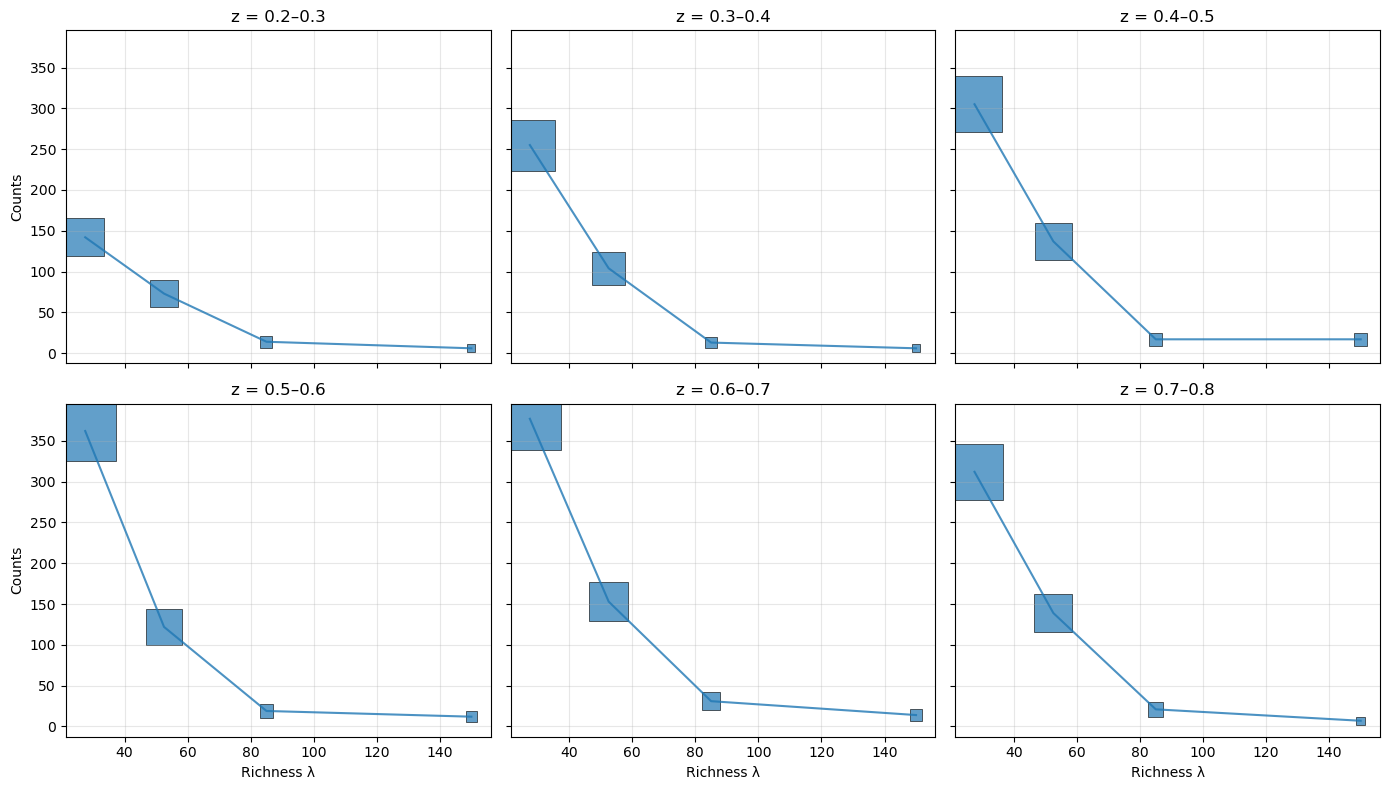

In [62]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    2, 3,
    figsize=(14, 8),
    sharex=True,
    sharey=True
)

axes = axes.flatten()

max_count = np.nanmax(counts_matrix)
size_scale = 2000 / max_count

for i, ax in enumerate(axes):
    
    counts = counts_matrix[i, :]
    sizes = counts * size_scale
    
    # Draw connecting line first
    ax.plot(
        rich_centers,
        counts,
        linewidth=1.5,
        alpha=0.8
    )
    
    # Draw square markers
    ax.scatter(
        rich_centers,
        counts,
        s=sizes,
        marker='s',
        alpha=0.7,
        edgecolor='black',
        linewidth=0.6
    )
    
    ax.set_title(f"z = {z_bin_label[i]}")
    ax.grid(alpha=0.3)

# Shared labels
for ax in axes[3:]:
    ax.set_xlabel("Richness λ")

for ax in axes[::3]:
    ax.set_ylabel("Counts")

plt.tight_layout()
plt.show()